In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://raw.githubusercontent.com/aoguedao/gmu-assip-2024/main/data/Diamond%20Prices%202022.csv"
diamonds_df = pd.read_csv(url)
diamonds_df.head()

,index,carat,cut,color,clarity,depth,table,price,x,y,z
0,66,0.28,Ideal,G,VVS2,61.4,56.0,553,4.19,4.22,2.58
1,127,0.91,Premium,H,SI1,61.4,56.0,2763,6.09,5.97,3.70
2,136,0.63,Premium,E,VVS1,60.9,60.0,2765,5.52,5.55,3.37
3,267,0.70,Premium,F,VS1,62.1,60.0,2792,5.71,5.65,3.53
4,324,1.04,Premium,G,I1,62.2,58.0,2801,6.46,6.41,4.00


In [ ]:
# Remove the column "index"

diamonds_df.drop("index", axis='columns')

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.28,Ideal,G,VVS2,61.4,56.0,553,4.19,4.22,2.58
1,0.91,Premium,H,SI1,61.4,56.0,2763,6.09,5.97,3.70
2,0.63,Premium,E,VVS1,60.9,60.0,2765,5.52,5.55,3.37
3,0.70,Premium,F,VS1,62.1,60.0,2792,5.71,5.65,3.53
4,1.04,Premium,G,I1,62.2,58.0,2801,6.46,6.41,4.00
...,...,...,...,...,...,...,...,...,...,...
995,0.70,Fair,G,VVS2,65.3,61.0,2710,5.58,5.48,3.61
996,0.84,Fair,G,VS1,55.6,64.0,2724,6.42,6.32,3.54
997,0.72,Very Good,F,VS2,59.6,63.0,2724,5.92,5.75,3.48
998,0.71,Ideal,G,SI1,61.6,57.0,2738,5.72,5.76,3.53


Text(0, 0.5, 'Price')

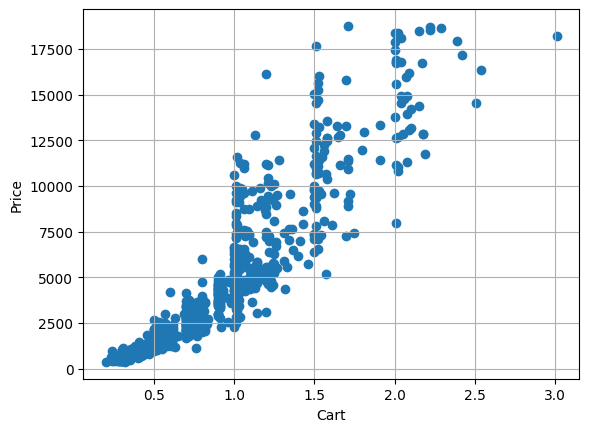

In [ ]:
# Plot price vs carat

x = diamonds_df['carat'].values
y = diamonds_df['price'].values

fig, ax = plt.subplots() # creates the canvas, one subplot (ax)
ax.scatter(x, y)

ax.grid()
ax.set_xlabel("Cart")
ax.set_ylabel("Price")


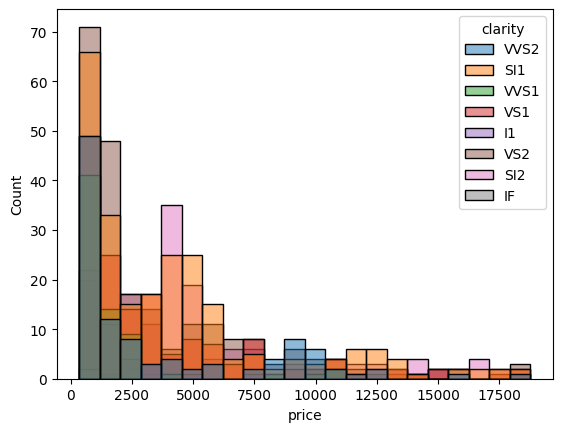

In [ ]:
# Plot price vs clarity

g = sns.histplot(
    data=diamonds_df,
    x="price",
    hue="clarity",
)

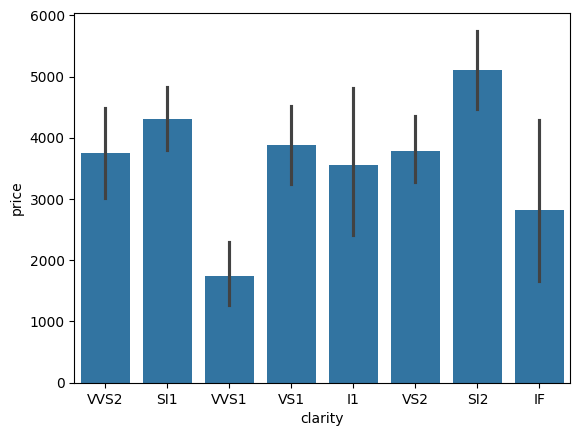

In [ ]:
sns.barplot(x = 'clarity',y = 'price',data = diamonds_df)
plt.show()

Text(0, 0.5, 'price')

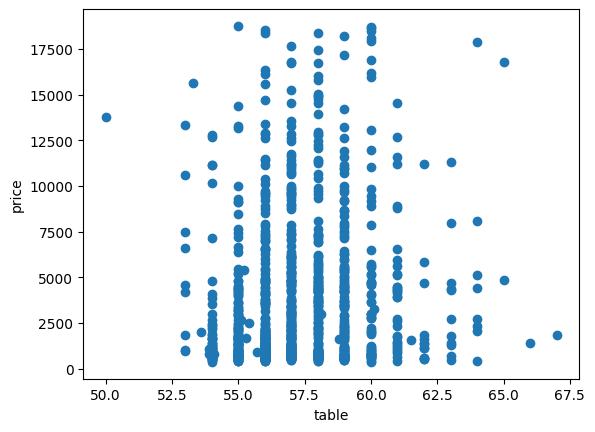

In [ ]:
# Plot price vs table

fig, ax = plt.subplots()
ax.scatter(diamonds_df['table'], diamonds_df['price'])
ax.set_xlabel("table")
ax.set_ylabel("price")

Can you see any relationship?

In [ ]:
# Use at least one machine learning model to predict price using carat, depth and table as predictors.

columns = [diamonds_df['carat'], diamonds_df['depth'], diamonds_df['table']]
diamonds_X = pd.concat(columns, axis=1).values
diamonds_y = diamonds_df['price'].values


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(diamonds_X, diamonds_y) # training
print(f"Coefficients:\n {model.coef_.T}\n") # coefficients are our variables
print(f"Score: {model.score(diamonds_X, diamonds_y)}")

Coefficients:
 [7969.15535606  -25.70747061  -84.15840679]

Score: 0.8635522909746018


In [ ]:
# Calculate the mean square error of your prediction

from sklearn.metrics import mean_squared_error
y_pred = model.predict(diamonds_X)
mean_squared_error(diamonds_y, y_pred)

2243108.402536782

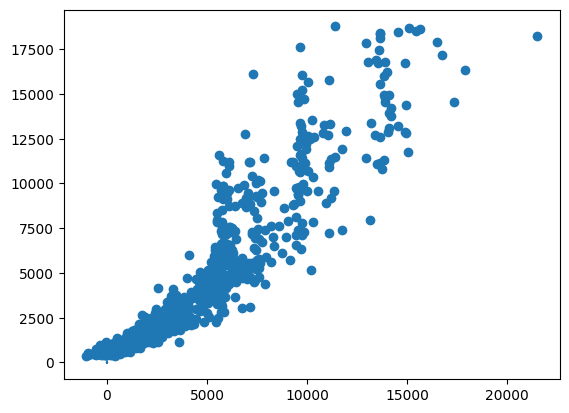

In [ ]:
# Plot your predicted price vs the real price. Add a line y=x for comparison
y_pred = model.predict(diamonds_X)
y = diamonds_df['price']

plt.scatter(y_pred, y)
plt.plot(x, x)


Comment your results!